
#**CNN:** Binary classification
*~~ Avni Bansal*


**Colab link -** [https://colab.research.google.com/drive/1MlL72F_a_qvLZ7xjj6F4hpZF8B_Kbrw3?authuser=0#scrollTo=73W2eXOWTLwa](https://)


**My Aim:** To learn application of Convolutional Neural Networks with binary image classification.


**Dataset link:** [https://www.kaggle.com/datasets/mattop/panda-or-bear-image-classification?resource=download](https://)

#Structure of dataset in drive

DATASET
--> PandasBears
*   **Train**
*   --> panda
*   --> bear

*   **Test**
*   --> panda
*   --> bear


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After mounting; I'll assign variables to train and test datasets.

In [18]:
train_path='/content/drive/MyDrive/Dataset/PandasBears/Train'
test_path='/content/drive/MyDrive/Dataset/PandasBears/Test'

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['Pandas','Bears'],batch_size=50,shuffle=True)

test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['Pandas','Bears'],batch_size=50,shuffle=True)

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.




---


From [https://github.com/harimurugan1989/Softcomputing/tree/master](https://) Ex5; Below lines for testing the class detected.
STARTS HERE


---



In [21]:
imgs,labels=next(train_batches)

In [22]:
# this fncn will plot imgs in the form of 1x10 where imgs are placed
def plotImages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

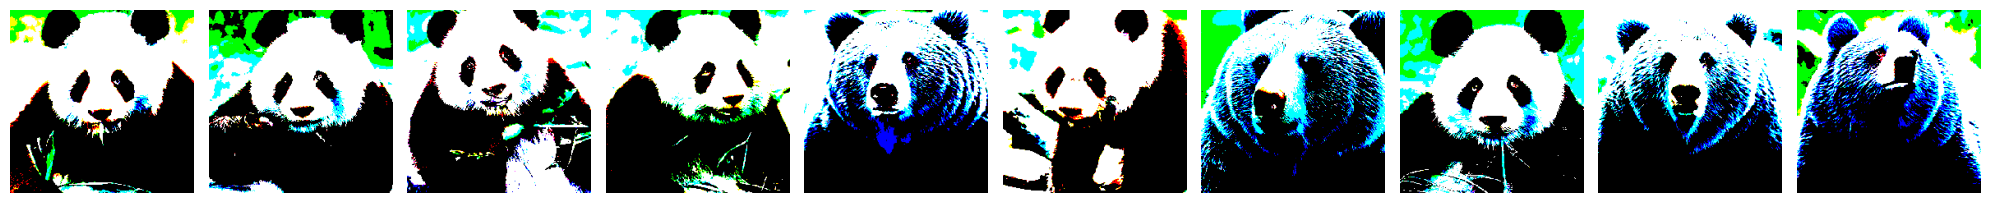

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [23]:
import matplotlib.pyplot as plt

plotImages(imgs)
print(labels)



---
ENDS HERE


---




In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [25]:
model=Sequential([
                  Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)), #param=(3*3*3+1)*32
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),  #param=(3*3*32+1)*64
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Flatten(),
                  Dense(units=2,activation='softmax'), #param=size of flatten*2+2
])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_1 (Dense)             (None, 2)                

In [27]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(x=train_batches,epochs=2,verbose=1)

Epoch 1/2
10/10 [==============================] - 49s 5s/step - loss: 16.0069 - accuracy: 0.7280
Epoch 2/2
10/10 [==============================] - 42s 4s/step - loss: 2.2208 - accuracy: 0.9720


In [29]:
predictions=model.predict(x=test_batches,verbose="auto")

In [30]:
predictions

array([[0.0000000e+00, 9.9999994e-01],
       [9.9999994e-01, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 9.9999994e-01],
       [9.9999994e-01, 5.9682836e-14],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 9.9999994e-01],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01],
       [9.9999994e-01, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 9.9999994e-01],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01],
       [4.3398785e-29, 9.

In [31]:
for [i,j] in predictions:
  if(i<j):
    print("Bear")
  else:
    print("Panda")



Bear
Panda
Bear
Bear
Bear
Panda
Panda
Panda
Bear
Bear
Panda
Panda
Bear
Panda
Bear
Bear
Bear
Bear
Panda
Panda
Bear
Panda
Panda
Panda
Bear
Bear
Panda
Bear
Panda
Bear
Panda
Panda
Panda
Panda
Panda
Bear
Panda
Bear
Panda
Panda
Panda
Bear
Bear
Bear
Bear
Panda
Bear
Panda
Bear
Panda
Bear
Panda
Panda
Panda
Panda
Bear
Panda
Panda
Bear
Panda
Panda
Panda
Panda
Panda
Bear
Panda
Panda
Panda
Panda
Bear
Panda
Bear
Panda
Bear
Bear
Panda
Bear
Panda
Bear
Panda
Bear
Bear
Bear
Bear
Panda
Bear
Bear
Panda
Bear
Panda
Panda
Bear
Bear
Bear
Bear
Bear
Panda
Bear
Panda
Bear
